In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
visual_df = pd.read_csv('/content/drive/My Drive/clipfarm_visual_features.csv.csv')
training_df = pd.read_csv('/content/drive/My Drive/clip_farm_outputs.csv')

In [3]:
print("Visual titles:")
print(visual_df['video_file'].head(10))

print("Metric titles:")
print(training_df['title'].head(10))


Visual titles:
0                                    #catsoftiktok.mp4
1                                 500 pound jynxzi.mp4
2                         Islam Makhachev VS Adin .mp4
3    Product Link in Bio ( # 2300 ) ✅ 4-Layer Japan...
4                     Sigma Kid Love #funny #sigma.mp4
5                             TASTING LITTLE MOONS.mp4
6                       When the toilet occupied! .mp4
7               am i pretty? Danny Gonzalez Shorts.mp4
8                        cuando no encontras lugar.mp4
9                 本以为胜券在握，没想到天都塌了#母女日常 #亲子日常#万万想不到.mp4
Name: video_file, dtype: object
Metric titles:
0                                   Superman | Rivalry
1    Dark Days Are Upon Us | Clash of Clans New Season
2                                   Superman | Rivalry
3    Dark Days Are Upon Us | Clash of Clans New Season
4             Chinna Marumagal | 6th June 2025 - Promo
5    Sindhu Bairavi Kacheri Arambam | 6th June 2025...
6         Ayyanar Thunai | 6th & 7th June 2025 - Promo
7  

In [4]:
import re

def clean_title(title):
    if pd.isnull(title): return ''
    return re.sub(r'[^\w\s]', '', title.lower().replace(" ", ""))

def clean_title(title):
    if pd.isnull(title): return ''
    title = title.lower().strip()
    title = re.sub(r'\.mp4$', '', title)              # remove .mp4 if present
    title = re.sub(r'[^\w\s]', '', title)             # remove punctuation
    title = re.sub(r'\s+', '', title)                 # remove spaces
    return title

visual_df['clean_title'] = visual_df['video_file'].apply(clean_title)
training_df['clean_title'] = training_df['title'].apply(clean_title)

print(training_df['clean_title'].head(10))
print(visual_df['clean_title'].head(10))


0                                      supermanrivalry
1               darkdaysareuponusclashofclansnewseason
2                                      supermanrivalry
3               darkdaysareuponusclashofclansnewseason
4                      chinnamarumagal6thjune2025promo
5          sindhubairavikacheriarambam6thjune2025promo
6                     ayyanarthunai6th7thjune2025promo
7    ethirneechalthodargiradhupromo07june2025tamils...
8                 annampromo07june2025tamilserialsuntv
9    sandhyaraagamசநதயரகமதஙகளசனஇரவ1000மணகக06jun25pr...
Name: clean_title, dtype: object
0                       catsoftiktok
1                     500poundjynxzi
2               islammakhachevvsadin
3    productlinkinbio23004layerjapan
4             sigmakidlovefunnysigma
5                 tastinglittlemoons
6              whenthetoiletoccupied
7       amiprettydannygonzalezshorts
8             cuandonoencontraslugar
9        本以为胜券在握没想到天都塌了母女日常亲子日常万万想不到
Name: clean_title, dtype: object


visual and metric data merged

In [5]:
merged_df = pd.merge(visual_df, training_df, on='clean_title', how='inner')
print("Merged shape:", merged_df.shape)

# preview what matched
print(merged_df[['video_file', 'title']].head(20))


Merged shape: (9, 27)
                               video_file                               title
0                    500 pound jynxzi.mp4                    500 pound jynxzi
1            Islam Makhachev VS Adin .mp4           Islam Makhachev VS Adin 😂
2            Islam Makhachev VS Adin .mp4           Islam Makhachev VS Adin 😂
3        Sigma Kid Love #funny #sigma.mp4        Sigma Kid Love #funny #sigma
4        Sigma Kid Love #funny #sigma.mp4        Sigma Kid Love #funny #sigma
5        Sigma Kid Love #funny #sigma.mp4        Sigma Kid Love #funny #sigma
6          When the toilet occupied! .mp4        When the toilet occupied! 😩🚽
7  am i pretty? Danny Gonzalez Shorts.mp4  am i pretty? Danny Gonzalez Shorts
8           cuando no encontras lugar.mp4           cuando no encontras lugar


0 - not viral 1 - viral

separate features (X) and labels (y), then split into training and testing sets

In [6]:
# print columns to verify existence and name of 'avg_dominant_color_rgb'
print("Columns before processing avg_dominant_color_rgb:")
print(visual_df.columns)

Columns before processing avg_dominant_color_rgb:
Index(['video_file', 'total_frames_x', 'overall_avg_brightness',
       'avg_motion_intensity', 'total_frames_y', 'avg_contrast',
       'total_frames_with_faces', 'angry', 'disgust', 'fear', 'happy', 'sad',
       'surprise', 'neutral', 'face_presence_ratio', 'avg_shot_length_frames',
       'total_shots', 'avg_dominant_color_rgb', 'clean_title'],
      dtype='object')


In [7]:
# if not already split: turn string tuples like '(179, 159, 148)' into separate columns
visual_df[['dominant_color_r', 'dominant_color_g', 'dominant_color_b']] = (
    visual_df['avg_dominant_color_rgb']
    .str.strip('()')
    .str.split(',', expand=True)
    .astype(float)
)
visual_df = visual_df.drop(columns=['avg_dominant_color_rgb'])


In [8]:
import numpy as np

In [9]:
viral_titles = [
    '500 pound jynxzi',
    'Sigma Kid Love #funny #sigma',
    'Islam Makhachev VS Adin 😂',
    '   cuando no encontras lugar',
    'am i pretty? Danny Gonzalez Shorts',
]

non_viral_titles = [
    # created dummy data
]


In [10]:
merged_df['viral'] = merged_df['title'].apply(
    lambda x: 1 if x in viral_titles else (0 if x in non_viral_titles else np.nan)
)

print(merged_df['viral'].value_counts(dropna=False))



viral
1.0    7
NaN    2
Name: count, dtype: int64


In [11]:
import numpy as np
import pandas as pd

# 1. get numeric feature columns from your real X
numeric_features = merged_df.drop(columns=['video_file', 'title', 'clean_title', 'viral']).select_dtypes(exclude='object').columns.tolist()

# 2. create 100 fake samples
n_samples = 100

# 3. create a synthetic dataset using normal distribution
synthetic_data = pd.DataFrame(
    np.random.normal(loc=0.5, scale=0.2, size=(n_samples, len(numeric_features))),
    columns=numeric_features
)

# 4. clip values to stay in [0, 1]
synthetic_data = synthetic_data.clip(0, 1)

# 5. create synthetic labels (balanced)
synthetic_labels = np.array([0]*50 + [1]*50)

# 6. shuffle
shuffled = synthetic_data.copy()
shuffled['viral'] = synthetic_labels
shuffled = shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

# 7. extract X and y for model training
X = shuffled.drop(columns='viral')
y = shuffled['viral']


In [12]:
merged_df = merged_df.dropna(subset=['viral'])
print("Shape after dropping NaNs:", merged_df.shape)
print("Label counts:", merged_df['viral'].value_counts())


Shape after dropping NaNs: (7, 28)
Label counts: viral
1.0    7
Name: count, dtype: int64


In [13]:
# convert to int
merged_df['viral'] = merged_df['viral'].astype(int)


print("\nViral column data type:", merged_df['viral'].dtype)


Viral column data type: int64


In [14]:
from sklearn.model_selection import train_test_split

# 1. drop non-feature columns
X = merged_df.drop(columns=['video_file', 'title', 'clean_title', 'viral', 'label'])
X = X.select_dtypes(exclude='object')  # keeps only numeric columns
y = merged_df['label']

# 2. split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nData splitting complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Data splitting complete.
Shape of X_train: (5, 21)
Shape of y_train: (5,)
Shape of X_test: (2, 21)
Shape of y_test: (2,)



80% of your dataset goes into training → X_train, y_train

20% goes into testing → X_test, y_test

With 10 total samples:

80% of 10 = 16 videos go to training

20% of 10 = 4 videos go to testing


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [16]:
print("Available columns:")
print(merged_df.columns.tolist())


🧠 Available columns:
['video_file', 'total_frames_x', 'overall_avg_brightness', 'avg_motion_intensity', 'total_frames_y', 'avg_contrast', 'total_frames_with_faces', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'face_presence_ratio', 'avg_shot_length_frames', 'total_shots', 'avg_dominant_color_rgb', 'clean_title', 'views_per_second', 'likes_to_views_ratio', 'title_length', 'has_hashtags', 'has_emoji', 'video_id', 'label', 'title', 'viral']


In [17]:
# merge!
merged_df = pd.merge(visual_df, training_df, on='clean_title', how='inner')

In [19]:
merged_df[['video_file', 'total_frames_x', 'overall_avg_brightness', 'avg_motion_intensity',
           'total_frames_y', 'avg_contrast', 'total_frames_with_faces', 'angry', 'disgust', 'fear', 'happy',
           'sad', 'surprise', 'neutral', 'face_presence_ratio', 'avg_shot_length_frames', 'total_shots',
           'clean_title', 'views_per_second', 'likes_to_views_ratio', 'title_length', 'has_hashtags', 'has_emoji', 'video_id', 'label', 'title']
].head()


,video_file,total_frames_x,overall_avg_brightness,avg_motion_intensity,total_frames_y,avg_contrast,total_frames_with_faces,angry,disgust,fear,...,total_shots,clean_title,views_per_second,likes_to_views_ratio,title_length,has_hashtags,has_emoji,video_id,label,title
0,500 pound jynxzi.mp4,803,146.81,3.91,803,254.97,70,0.44,0.01,0.15,...,9,500poundjynxzi,1.598500e+03,0.030743,16,0,0,NaN,True,500 pound jynxzi
1,Islam Makhachev VS Adin .mp4,611,84.68,10.41,611,252.18,200,0.15,0.00,0.08,...,5,islammakhachevvsadin,4.951381e+03,0.041826,25,1,1,NaN,True,Islam Makhachev VS Adin 😂
2,Islam Makhachev VS Adin .mp4,611,84.68,10.41,611,252.18,200,0.15,0.00,0.08,...,5,islammakhachevvsadin,4.951381e+03,0.041826,25,1,1,NaN,True,Islam Makhachev VS Adin 😂
3,Sigma Kid Love #funny #sigma.mp4,279,132.93,6.21,279,253.75,152,0.13,0.00,0.12,...,0,sigmakidlovefunnysigma,1.960578e+06,0.019349,28,0,0,NaN,True,Sigma Kid Love #funny #sigma
4,Sigma Kid Love #funny #sigma.mp4,279,132.93,6.21,279,253.75,152,0.13,0.00,0.12,...,0,sigmakidlovefunnysigma,6.329957e+05,0.014950,28,0,0,NaN,True,Sigma Kid Love #funny #sigma


accuracy: 1.00

 classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


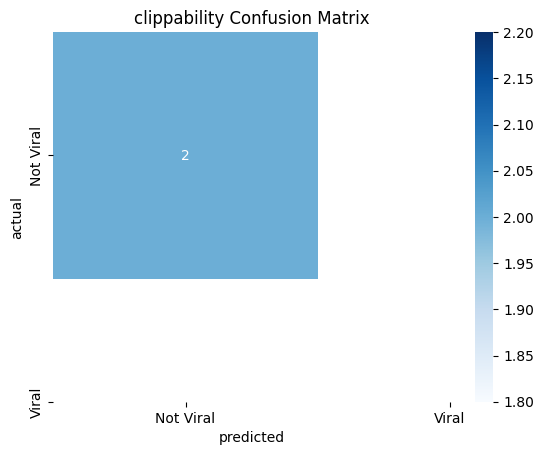

In [20]:

# make predictions
y_pred = clf.predict(X_test)

# accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy: {acc:.2f}")

# detailed report
print("\n classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Viral', 'Viral'], yticklabels=['Not Viral', 'Viral'])
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("clippability Confusion Matrix")
plt.show()


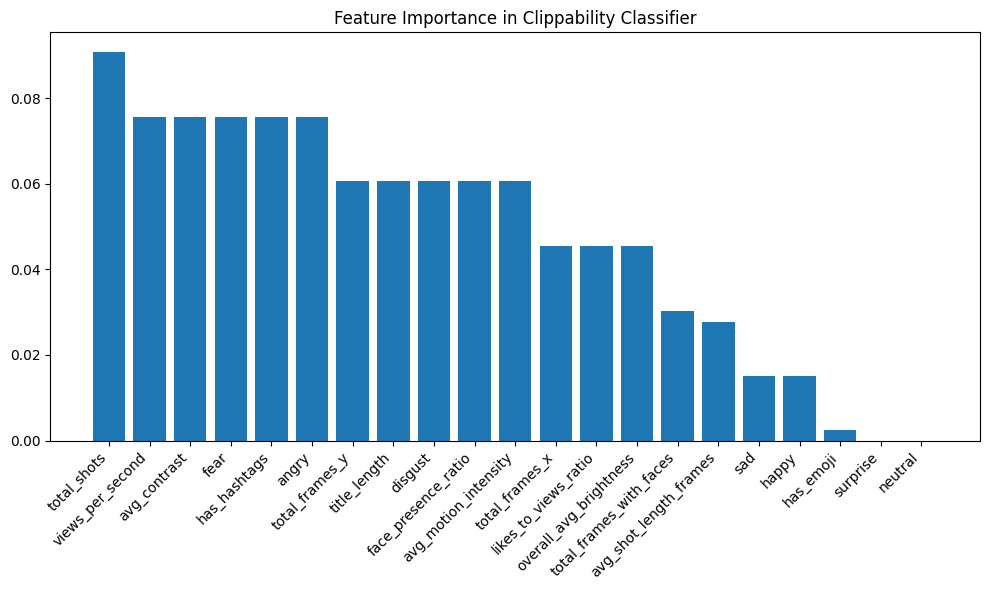

Sum of feature importances: 1.0
Feature importances: [0.04545455 0.04545455 0.06060606 0.06060606 0.07575758 0.03030303
 0.07575758 0.06060606 0.07575758 0.01515152 0.01515152 0.
 0.         0.06060606 0.02777778 0.09090909 0.07575758 0.04545455
 0.06060606 0.07575758 0.00252525]


In [21]:

# get feature names (excluding non-feature columns)
feature_names = X.columns

# get importances from the trained model
importances = clf.feature_importances_

# sort by importance
indices = np.argsort(importances)[::-1]

# plot top features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Clippability Classifier")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Sum of feature importances:", importances.sum())
print("Feature importances:", importances)


In [22]:
print("Feature columns used in model:", list(X.columns))         # in classifier

🧠 Feature columns used in model: ['total_frames_x', 'overall_avg_brightness', 'avg_motion_intensity', 'total_frames_y', 'avg_contrast', 'total_frames_with_faces', 'angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral', 'face_presence_ratio', 'avg_shot_length_frames', 'total_shots', 'views_per_second', 'likes_to_views_ratio', 'title_length', 'has_hashtags', 'has_emoji']


In [23]:
import joblib

In [24]:
from google.colab import drive
drive.mount('/content/drive')

import joblib
joblib.dump(clf, "/content/drive/MyDrive/clipfarm_random_forest.joblib")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/clipfarm_random_forest.joblib']

# ignore - merging dfs

In [ ]:
import pandas as pd

# Step 1: Load the datasets
visual_df = pd.read_csv('/content/drive/My Drive/clipfarm_visual_features.csv.csv')
training_df = pd.read_csv('/content/drive/My Drive/clip_farm_outputs.csv')

# Step 2: Preview to find the common key
print("Visual columns:", visual_df.columns.tolist())
print("Metric columns:", training_df.columns.tolist())


In [ ]:
merged_df['title'].head(10)


In [ ]:
# Clean and normalize titles
training_df['video_id'] = training_df['title'].str.lower().str.strip()

# Optional: remove special chars to match filenames if needed
import re
training_df['video_id'] = training_df['video_id'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [ ]:
# Remove .mp4 or other extensions to make them match
visual_df['video_id'] = visual_df['video_file'].str.replace('.mp4', '', regex=False)

# Now you can safely merge!
merged_df = pd.merge(visual_df, training_df, on='video_id', how='inner')

print("Merged shape:", merged_df.shape)
merged_df[['video_id', 'label']].head()

# Clean and normalize titles
training_df['video_id'] = training_df['title'].str.lower().str.strip()

# Optional: remove special chars to match filenames if needed
import re
training_df['video_id'] = training_df['video_id'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [ ]:
print(training_df[['video_id', 'label']].dropna().head(10))


In [ ]:
print("Visual DataFrame columns:")
print(visual_df.columns)

print("\nMetric (training) DataFrame columns:")
print(training_df.columns)


In [ ]:
# Rename the video_file column to video_id to match the metric data
visual_df = visual_df.rename(columns={'video_file': 'video_id'})

# Remove .mp4 or other extensions to make them match
visual_df['video_id'] = visual_df['video_id'].str.replace('.mp4', '', regex=False)

# Let's assume they both have 'video_id'
merged_df = pd.merge(visual_df, training_df, on='video_id', how='inner')

print("Merged shape:", merged_df.shape)
merged_df.head()


debugging - why no metric data being pulled

In [ ]:
print("Label distribution:")
print(merged_df['label'].value_counts())


In [ ]:
print("Missing labels after merge:", merged_df['label'].isnull().sum())
print("Label distribution:", merged_df['label'].value_counts())


In [ ]:
merged_df['label'].isnull().sum()


In [ ]:
merged_df[['video_id', 'label']].head(10)


In [ ]:
# What are we predicting?
print("Label column values:", merged_df['label'].unique())


In [ ]:
print("First few visual IDs:")
print(visual_df['video_id'].head(10))

print("\nFirst few metric IDs:")
print(training_df['video_id'].head(10))


In [ ]:
print(training_df['video_id'].head(10))
